### Telecom Customer Churn Prediction

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

### Reading the data 

The dataset contains the following information:

1- Customers who left within the last month – the column is called Churn

2- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4- Demographic info about customers – gender, age range, and if they have partners and dependents




In [9]:
telecom_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
telecom_data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Checking the missing values from dataset

In [11]:
telecom_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
telecom_data.shape

(7043, 21)

In [13]:
# Converting Total Charges to a numerical data type.
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges, errors='coerce')
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
### 11 missing values were found for the TotalCharges and will be removed from our dataset

#Removing missing values 
telecom_data.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = telecom_data.set_index('customerID')

#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()
df2.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


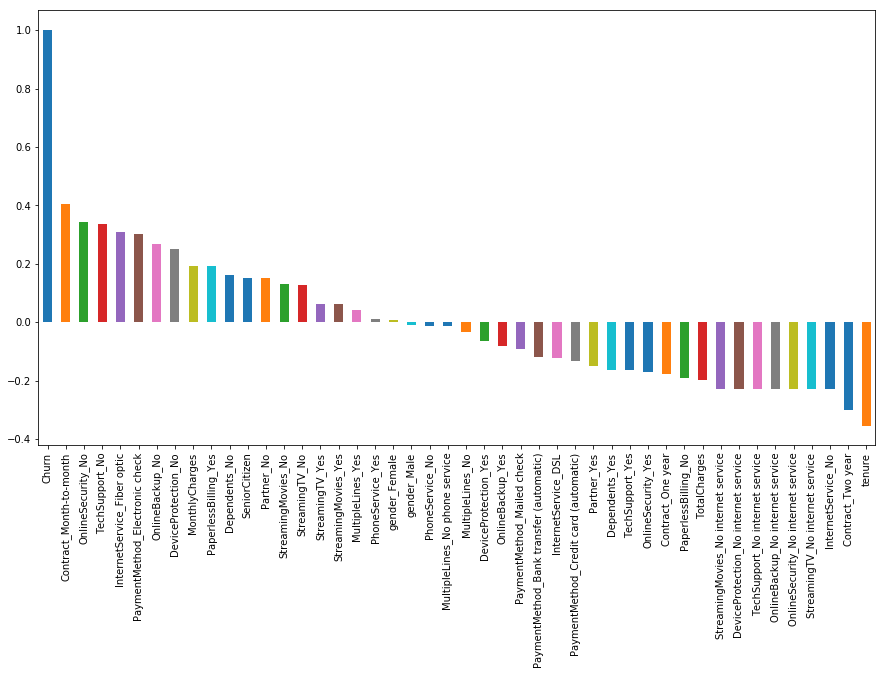

In [15]:
## Evaluating the correlation of "Churn" with other variables

plt.figure(figsize=(15,8))

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

As it is depicted, month to month contract, online security, and techsupport seem to be highly correlated values with high possibility of churn. tenure and two years contract are negatively correlated with churn. 

### Evaluating the Churn Rate

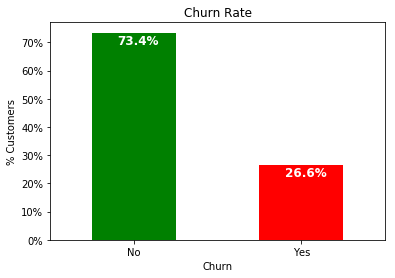

In [17]:
colors = ['g','r']
ax = (telecom_data['Churn'].value_counts()*100.0 /len(telecom_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


Here, we can see almost 74% of customers stayed with the company and 27% of customers churned. 

### Churn by Contract Type
As shown in the correlation plot, customer with monthly plan, have a high potential of churning

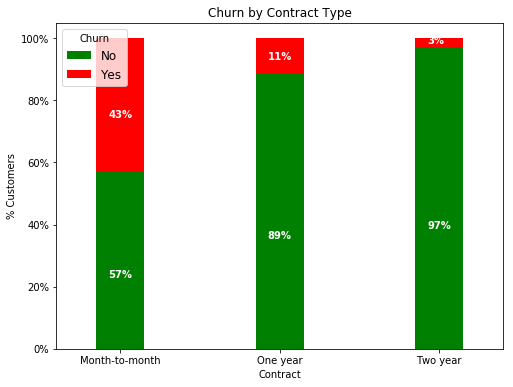

In [19]:

contract_churn = telecom_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')


### Churn by Monthly Charges
In this part, we can see customer with higher monthly charges, have more tend to churn.

C:\Users\forou\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

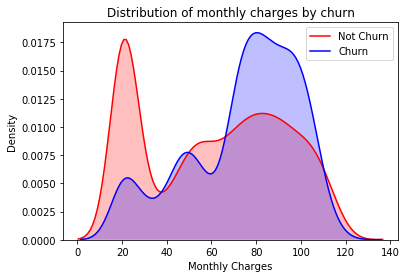

In [20]:
ax = sns.kdeplot(telecom_data.MonthlyCharges[(telecom_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.MonthlyCharges[(telecom_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## Applying Machine Learning Algorithms

### Logestic Regression

In [21]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= df_dummies.index)
X.columns = features
X.head()

C:\Users\forou\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5575-GNVDE,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7795-CFOCW,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9237-HQITU,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\forou\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


In [25]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)

TotalCharges                               0.923935
Contract_Month-to-month                    0.702733
InternetService_Fiber optic                0.490568
SeniorCitizen                              0.271989
PaymentMethod_Electronic check             0.213377
TechSupport_No                             0.194497
OnlineSecurity_No                          0.191300
StreamingTV_Yes                            0.179419
StreamingMovies_Yes                        0.105166
PaperlessBilling_Yes                       0.060530
OnlineBackup_No                            0.052013
PhoneService_No                            0.030664
MultipleLines_No phone service             0.030664
DeviceProtection_No                        0.025944
MultipleLines_Yes                          0.022437
DeviceProtection_Yes                      -0.011534
Dependents_No                             -0.015179
OnlineBackup_Yes                          -0.037604
Partner_No                                -0.058957
gender_Femal

From Logestic Regression model we can understand having two years contract, and internet service DSL reduces the churn rate. Also, tenure and two years contract have the least churn rate.

On the other hand, total charges, monthly contract, and internet service fiber optic have the highest churn rate from the logestic regression model.

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8113744075829384


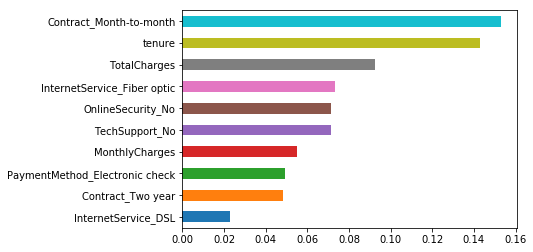

In [27]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Based on the Random Forest model, monthly contract, tenure, and total charges are considered as the most important factors for churning.

### Support Vecor Machine (SVM) 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [29]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

Suport vector machine shows better performance in terms of accuracy compare to Logestic Regression and Random Forest models. 

In [30]:
Churn_pred = preds[preds==1]
Churn_X_test = X_test[preds==1]
print("Number of customers predicted to be churner is:", Churn_X_test.shape[0], " out of ", X_test.shape[0])

Number of customers predicted to be churner is: 290  out of  1407


In [31]:
Churn_X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
1104-TNLZA,1.0,0.380282,0.871144,0.343780,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1122-JWTJW,0.0,0.000000,0.521393,0.005983,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2495-INZWQ,0.0,0.042254,0.261692,0.017944,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6729-GDNGC,1.0,0.267606,0.621393,0.184099,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
0112-QAWRZ,0.0,0.211268,0.721891,0.164251,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


This is the list of target customers, who haven't churned but are likely to.

## Confusion matrix definition

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Compute confusion matrix for SVM


Confusion matrix, without normalization
[[953  89]
 [164 201]]


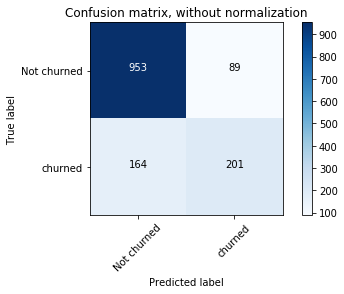

In [116]:
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()

In the first column, confusion matrix predicted 1,117 customer with not churned label. Out of this number, 953 customer predicted with true label and did not churned and 164 customer predicted with false label and churned. 

Similarly, in the second column, confusion matrix predicted 290 customers with churned label. Out of this number, 201 customer predicted with true label and churned and 89 customers predicted with flase label and did not churned.



## Applying Artificial Intelligence Methods

### Here we use Keras library with TensorFlow backend to run Deep Neural Network model.

In [124]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, TimeDistributed, Bidirectional
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [125]:
X_train.shape

(5625, 45)

### Designing the Model

In [126]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation= 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation= 'sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                460       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model and Fit It

In [158]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, epochs=3000, batch_size=100, validation_split=.30, verbose=0,callbacks=[checkpointer])
model.load_weights('weights.hdf5')

### summarize history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


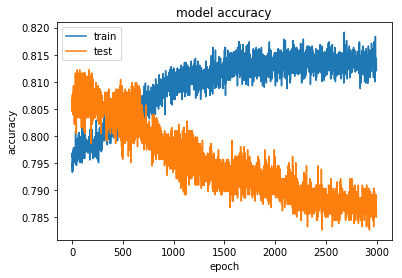

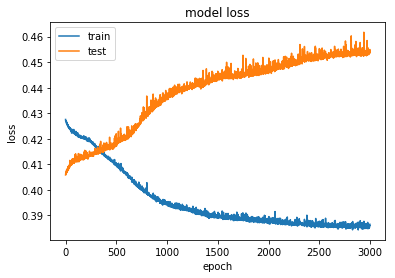

In [159]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Evaluating the Model

Confusion matrix, without normalization
[[964  78]
 [171 194]]


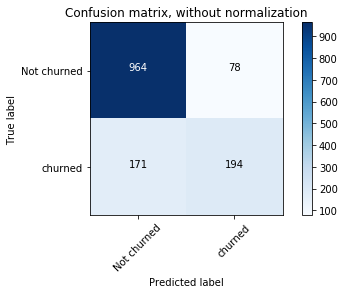

In [160]:
prediction_test_Dense= model.predict_classes(X_test)
cm = confusion_matrix(y_test, prediction_test_Dense)


# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

In [161]:
print('''In the first column, confusion matrix predicted''',(cm[0,0]+cm[1,0]),'''customer with not churned label. 
Out of this number,''' ,(cm[0,0]),'''customers were predicted with true label and did not churned 
and''' ,(cm[1,0]),'''customers were predicted with false label and churned.''')

print('''Similarly, in the second column, confusion matrix predicted''' ,(cm[0,1]+cm[1,1]),'''customers with churned label. 
Out of this number,''' ,(cm[1,1]),'''customers were predicted with true label 
and churned and''' ,(cm[0,1]),'''customers were predicted with flase label and did not churned.''')

In the first column, confusion matrix predicted 1135 customer with not churned label. 
Out of this number, 964 customers were predicted with true label and did not churned 
and 171 customers were predicted with false label and churned.
Similarly, in the second column, confusion matrix predicted 272 customers with churned label. 
Out of this number, 194 customers were predicted with true label 
and churned and 78 customers were predicted with flase label and did not churned.


## Analyse time to churn based on features

In [74]:
##Using lifeline features
import lifelines
from lifelines import KaplanMeierFitter


In [80]:
kmf = KaplanMeierFitter()

T = telecom_data['tenure']

#Convertin the predictor variable in a binary numeric variable
telecom_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_data['Churn'].replace(to_replace='No',  value=0, inplace=True)
E = telecom_data['Churn']
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 7032 observations, 5163 censored>

### Plot Survival

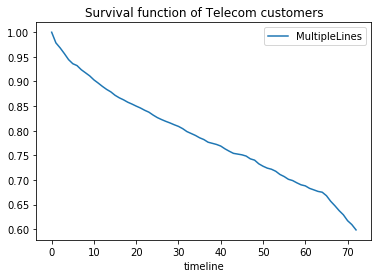

In [136]:
kmf.survival_function_.plot()
plt.title('Survival function of Telecom customers');

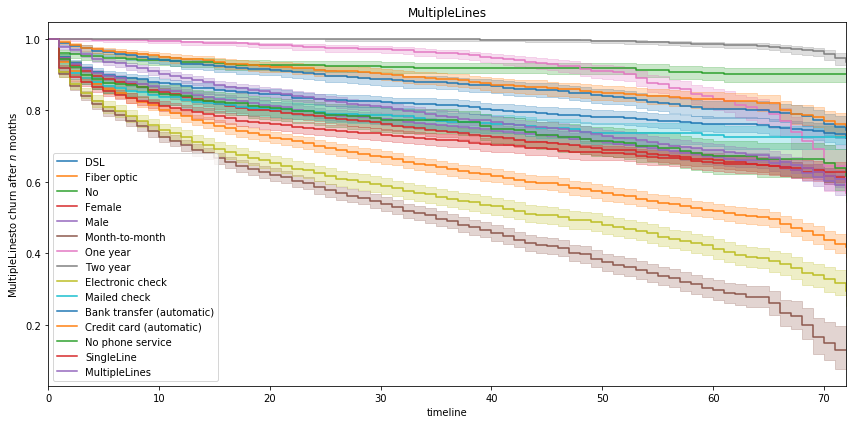

In [137]:
max_life = T.max()
ax = plt.subplot(111)
telecom_data['MultipleLines'].replace(to_replace='Yes', value='MultipleLines', inplace=True)
telecom_data['MultipleLines'].replace(to_replace='No',  value='SingleLine', inplace=True)
feature_columns = ['InternetService', 'gender', 'Contract', 'PaymentMethod', 'MultipleLines']
for feature in feature_columns:
    feature_types = telecom_data[feature].unique()
    for i,feature_type in enumerate(feature_types):
        ix = telecom_data[feature] == feature_type
        kmf.fit( T[ix], E[ix], label=feature_type)
        kmf.plot(ax=ax, legend=True, figsize=(12,6))
        plt.title(feature_type)
        plt.xlim(0, max_life)
        if i==0:
            plt.ylabel(feature+ 'to churn after $n$ months')
    plt.tight_layout()

This plot shows month-to-month contract and electronic check have very high potential of churn, while two years contract and no phone service are mostly staying with company for longer periods.